### This code does additional performance calculations; ROC and AUC. it is in separate file since it was the plane to use it for both approaches

### By Samir Abdel Rahman

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.metrics import  roc_curve, auc, roc_auc_score

In [2]:
# The excel file will be generated from the TL Code. select the one you want and uncomment it.

fileName= "alexnet-DS1-ProbTable.xlsx" # <<<< Lowest AUC
# fileName= "alexnet-DS3-ProbTable.xlsx"
# fileName= "resnet18-DS1-ProbTable.xlsx"
# fileName= "resnet18-DS3-ProbTable.xlsx"
# fileName= "resnet50-DS1-ProbTable.xlsx"
fileName= "resnet50-DS3-ProbTable.xlsx" # <<<<<<<Highest AUC


DF=pd.read_excel('Prob\\' +fileName)
# DF.reset_index(inplace=True)
DF

Unnamed: 0                                                  0       1  \
0               0                                         Image Name  Classs   
1               1  DS3\Hymenolepis_diminuta\NEWHymenolepis diminu...       5   
2               2      DS3\Trichuris\NEWTrichuris trichiura_0256.jpg      10   
3               3             DS3\Taenia\NEWTaenia spp. egg_0839.jpg       9   
4               4              DS3\Hookworm\NEWHookworm egg_0921.jpg       4   
...           ...                                                ...     ...   
10996       10996        DS3\Paragonimus\NEWParagonimus spp_0932.jpg       8   
10997       10997    DS3\Fasciolopsis\NEWFasciolopsis buski_0673.jpg       3   
10998       10998  DS3\Enterobius\NEWEnterobius vermicularis_0287...       2   
10999       10999  DS3\Capillaria\NEWCapillaria philippinensis_07...       1   
11000       11000        DS3\Paragonimus\NEWParagonimus spp_0262.jpg       8   

             2           3           4             5         6  \
0      Ascaris  Capillaria  Enterobius  Fasciolopsis  Hookworm   
1            0           0           0             0         0   
2            0           0           0             0         0   
3            0           0           0             0         0   
4            0           0           0             0         1   
...        ...         ...         ...           ...       ...   
10996        0           0           0             0         0   
10997        0           0           0             1         0   
10998        0           0           1             0         0   
10999        0           1           0             0         0   
11000        0           0           0             0         0   

                          7                 8             9           10  \
0      Hymenolepis_diminuta  Hymenolepis_nana  Opisthorchis  Paragonimus   
1                         1                 0             0            0   
2                         0                 0             0            0   
3                         0                 0             0            0   
4                         0                 0             0            0   
...                     ...               ...           ...          ...   
10996                     0                 0             0            1   
10997                     0                 0             0            0   
10998                     0                 0             0            0   
10999                     0                 0             0            0   
11000                     0                 0             0            1   

           11         12  
0      Taenia  Trichuris  
1           0          0  
2           0          1  
3           1          0  
4           0          0  
...       ...        ...  
10996       0          0  
10997       0          0  
10998       0          0  
10999       0          0  
11000       0          0  

[11001 rows x 14 columns]

In [3]:
DF2=DF.drop(0,axis=0)
DF2.columns
DF2.drop([DF.columns[0],DF.columns[1]],axis=1,inplace=True)
# # DF.drop(DF.columns[0],axis=1,inplace=True)
DF2.columns
y=np.array(DF2[DF2.columns[0]]).astype(int)
PROB=np.array(DF2.drop([DF2.columns[0]],axis=1)).astype(float)
# PROB.sum(axis=1)
PROB.shape

(11000, 11)

In [4]:

Yy=y==1

PROB[:,1]=PROB[:,1]+1-PROB.sum(axis=1) # will fix fraction summation to 1 problem.


roc_auc_score(y,PROB,average="macro",multi_class='ovr')

0.9984992181818182

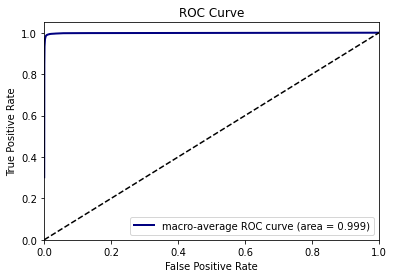

In [5]:

# Compute ROC curve and ROC area for each class. inspired from https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(11):
    Yy=y==i
    fpr[i], tpr[i], _ = roc_curve(Yy, PROB[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
1+1
 
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(11)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(11):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 11

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

 
plt.figure()

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.3f})".format(roc_auc["macro"]),
    color="navy",
    linestyle="-",
    linewidth=2,
)


plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()